# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow


Resources: 

https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

In [ ]:
what_were_covering = { 1: "data (prepare and load)" , 
                       2: "build model",
                       3: "fitting the model to data (training)", 
                       4: "making predictions and evaluating the model (inference)",
                       5: "saving and loading a model",
                       6: "putting it all together" }

In [ ]:
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating the model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all PyuTorch's building blocks forNeural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.0+cu118'

### 1. Data (preparing and loading)

Data can be almost anything in ML

* Excel speadsheet
* Image of any kind
* Video (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

ML is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known" data using the linear regression formula. 

We'll use a linear regression formula to make a straight line with known parameters.

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in ML in general)

Let's create a training and test set with out data




In [ ]:
# Create a train/test split

train_spit = int(0.8 * len(X))
X_train, y_train = X[:train_spit], y[:train_spit]
X_test, y_test = X[train_spit:], y[train_spit:]

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize!"

In [ ]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})
    plt.show()


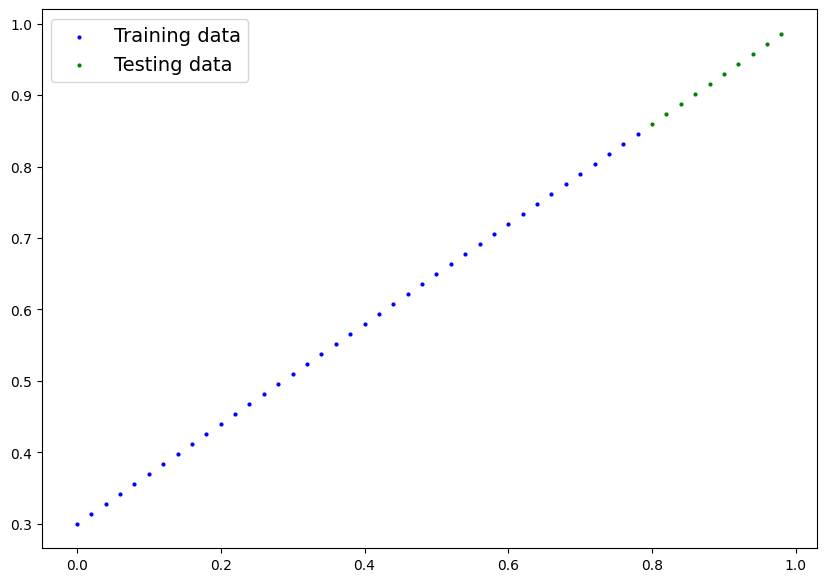

In [ ]:
plot_predictions()

## 2. Build model

First Pytorch model!


being familiar with OOP in python.
Resource from real python:
  https://realpython.com/python3-object-oriented-programming/


What the model does: 
* Start with random  values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)


How?

Through two main algorithm
1. Gradient descent
2. Backpropagation

In [ ]:
# Create linear regression model class
# https://pytorch.org/docs/stable/generated/torch.nn.Module.html
class LinearRegressionModel(nn.Module):
    # almost everything in PyTorch inherhits from nn.Module
    def __init__(self):
      super().__init__()
      self.weight = nn.Parameter(torch.randn(1, 
                                              requires_grad=True,
                                              dtype=torch.float)) # start with a random weight and try to adjust it to the ideal weight
      self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
      return self.weight * x + self.bias # This is the linear regression formula


### PyTorch model building essentials

* torch.nn - contains all of the buldings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modeuls, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent (instead of being random)
* def forward() - All nn.Module subclasses require you to overwirte forwrrad(), this method defines what happens in the forward computation.



### Checking the contents of our PyTorch model

Now that the model is created, let's see what's inside....

Can check the model parameters or what's inside the model using .parameters()

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
import numpy as np
# Plot the loss curves

### Making prediction using 'torch.inderence_mode()'

To check our model's predictive power, let's see how well it predicts 'y_test' based on 'X_text'

When we pass data through our model, it's going to run it through the forward() method

In [ ]:
# Make predictuions with model
with torch.inference_mode(): # inference mode (not saving - making faster)
  y_preds = model_0(X_test)

"""
# Can do similar with torc h,.no_grad(), but inference mode() is preferred
with torch.no_grad():
  y_preds = model_0(X_test)
y_preds
"""

'\n# Can do similar with torc h,.no_grad(), but inference mode() is preferred\nwith torch.no_grad():\n  y_preds = model_0(X_test)\ny_preds\n'

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

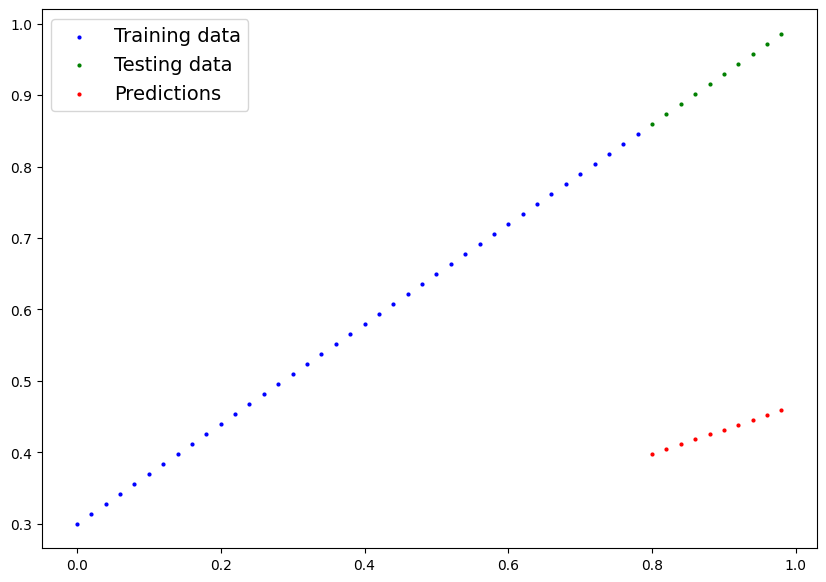

In [ ]:
plot_predictions(predictions=y_preds)

### 3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use loss functions.

* Note: Loss finction may be also called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

* **Loss function:** A function to measure how wrong the model's preductions are to the ideal outputs, lower is better.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters(e.g. weight & bais) to improve the loss function.

And specifically for Pytorch, we need:
* A training loop
* A testing loop


In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out our model's parameters(a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradientg descent) - random
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate

In [ ]:
loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do... (look at the data multiple times)
1. Forward pass (this involves data moving through our model's forward() functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss(**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [ ]:
# An epoch is one loop through the data... (this is a hyperparameter becasue we've set it ourself
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

# 0. loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Preform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (preform gradient descent)
  optimizer.step() # by default the optimizer changes will accumuate through the loop, - we have to zero them above in step 3
  

  ### Testing
  model_0.eval() # turns off gradient setting in the model not needed for evaluation/testing(dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & more things behind the scences (faster than no_grad() / in older pytorch code)
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}/n")

    # Print out model state_dict()
    print(model_0.state_dict())



Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495/n
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428/n
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688/n
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703/n
OrderedDict([('weight', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106/n
OrderedDict([('weight', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024/n
OrderedDict([('weight', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135/n
OrderedDict([('weight', tensor([0.5116])), ('bias', tensor(

In [ ]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight, bias

(0.7, 0.3)

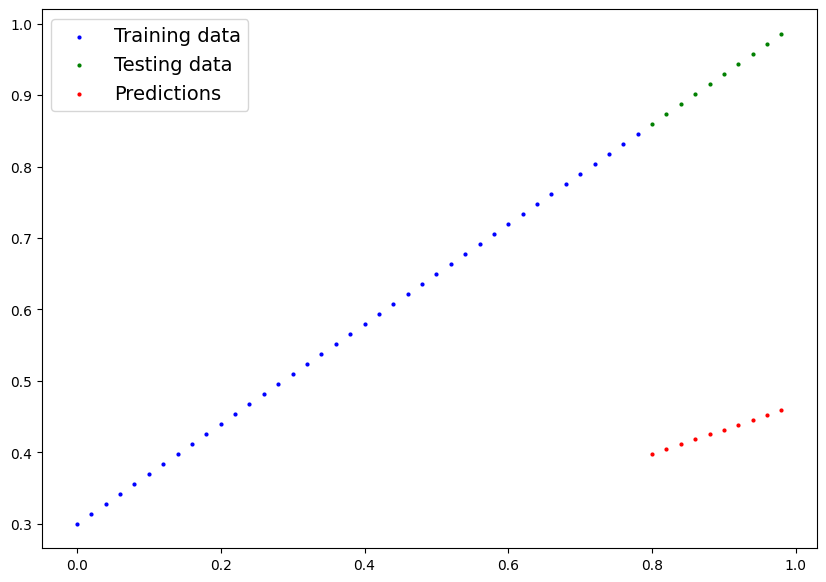

In [ ]:
plot_predictions(predictions=y_preds);

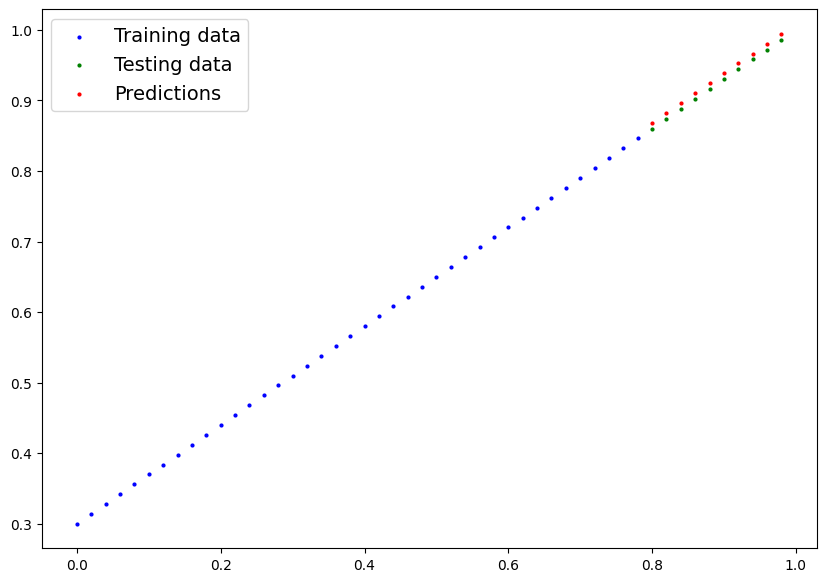

In [ ]:
plot_predictions(predictions=y_pred_new);

## Saving a model in PyTorch

There are three main methods you should about for saving and loading models in Pytorch.

1. `torch.save()` - allows you to save a Pytorch object in Pytyhoin's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary
https://pytorch.org/tutorials/recipes/recipes/saving_and_loading_models_for_inference.html


In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Saving our Pytorch model
from pathlib import Path

# 1.Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth" # .pth or .pt
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the MODEL_SAVE_PATH
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
model_0

LinearRegressionModel()

In [ ]:
!ls -l models

total 8
-rw-r--r-- 1 root root 1207 May  3 09:52 01_pytorch_workflow_model_0.pth
-rw-r--r-- 1 root root 1207 May  3 09:49 01_pytorch_workflow_model_1.pth


## Loading a PyTorch model

Since we save our model's 'state_dict()' rather than the etire model, we'll create a new instance of our model class and load the saved 'state_dict()' into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds



tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded model with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. putting it all together

Let's go back through the steps above and see it all in one place.


In [ ]:
# Import Pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check Pytorch version
torch.__version__

'2.0.0+cu118'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
!nvidia-smi

Wed May  3 09:52:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    33W /  70W |    821MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 6.1 Data

In [ ]:
# Create some data using the linear regression formula of y = weigth * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze errors will pop out!
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_spit]
X_text, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
# created function from before

def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})
    plt.show()


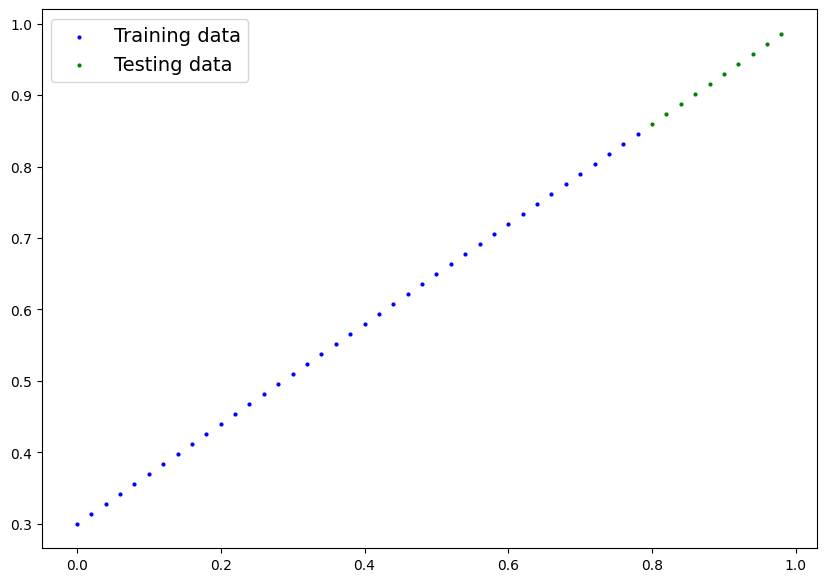

In [ ]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear model

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called: linear transfor, probing layer, fully connected layer...
    self.linear_layer = nn.Linear(in_features=1, 
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)



# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device) # to is sending the model to GPU memory
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function (measures how wrong our model is)
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  # 1, Forward pass
  y_pred = model_1(X_train) # data is by default in CPU!

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()


  ### Testing
  model_1.eval()
  with torch.inference_mode():
    text_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

RuntimeError: ignored

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7489]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.7900], device='cuda:0'))])

In [ ]:
weight, bias

(0.7, 0.3)

## 6.4 Making and evaluating predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval() # for prediction, need the model to be in eval mode

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds



tensor([[1.3892],
        [1.4041],
        [1.4191],
        [1.4341],
        [1.4491],
        [1.4641],
        [1.4790],
        [1.4940],
        [1.5090],
        [1.5240]], device='cuda:0')

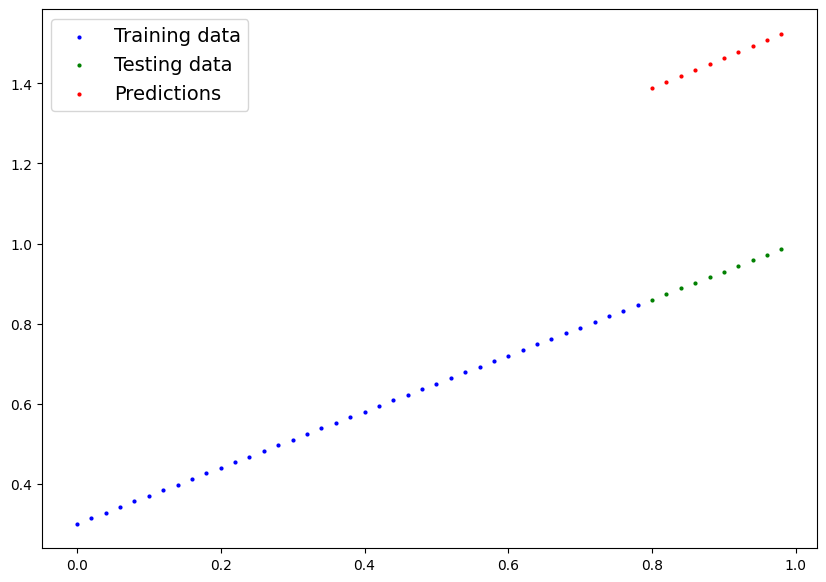

In [ ]:
# Check our our model predictions visually
plot_predictions(predictions=y_preds.cpu())

In [ ]:
weight, bias

(0.7, 0.3)

### 6.5 Saving & Loading a trained model

In [ ]:
# Saving our Pytorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the MODEL_SAVE_PATH
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
model_1

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
!ls -l models

total 8
-rw-r--r-- 1 root root 1207 May  3 09:52 01_pytorch_workflow_model_0.pth
-rw-r--r-- 1 root root 1207 May  3 09:57 01_pytorch_workflow_model_1.pth


In [ ]:
# Loading a PyTorch model

model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7489]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.7900], device='cuda:0'))])

In [ ]:
# Instantiate a new instance of our model class
loaded_model_1 = LinearRegressionModelV2()

# Load the saved state_dict of the model (This will update the new instance with the saved parameters)
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Move the model to the device (e.g. CPU or GPU)
loaded_model_1.to(device)



RuntimeError: ignored

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Compare loaded model with original model preds
y_preds.cpu() == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds.cpu() == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
# Evaluate loaded model
loaded_model_1.to(device)
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

# Compare with ground truth
print(torch.allclose(loaded_model_1_preds, y_test))

False
